# Wahlanalyse Projekt - Lösung

In diesem Datenprojekt werden wir uns Daten der US Wahl von 2012 anschauen.

Wir werden dazu zwei Datensätze analysieren. Der erste wird die Ergebnisse einer Umfrage zur Wahl von Obama vs. Romney an. Es gibt einige Fragen, denen wir uns annehmen möchten:

1. Wer wurde befragt und zu welcher Partei fühlten sie sich zugehörig?
2. Haben die Umfrageergebnisse Romney oder Obama favorisiert?
3. Wie beinflussen unentschiedene Wähler die Umfrage?
4. Können wir auf die unentschiedenen Wähler Rücksicht nehmen?
5. Wie hat sich die Wählerschaft über die Zeit verändert?
6. Können wir einen Einfluss der TV-Debatten auf die Umfrageergebnisse feststellen?

Den zweiten Datensatz besprechen wir später. 

**Importiere zuerst `Pandas`, aus Pandas im Speziellen `Series` und `DataFrame` und zusätzlich `Numpy`.**

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

**Importiere `Matplotlib`, `Seaborn`, setze den Seaborn Style auf "whitegrid" fest und matplotlib "inline".**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Lies die Daten aus `poll.csv` (dt. Umfrage) in einen DataFrame namens "poll_df" ein.**

In [3]:
poll_df = pd.read_csv("poll.csv")

**Schaue dir die `info()`, `describe()` und `head()` zum DataFrame an.**

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [5]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Jetzt wo wir unseren DataFrame etwas besser kennen können wir eine erste Visualisierung erzeugen.

**Erstelle mit Seaborn ein `Countplot`, das die Zugehörigkeit (en. Affiliation) der Befrageten darstellt.**

In [7]:
# Dein Code hier

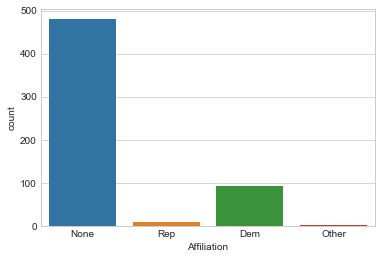

In [8]:
sns.countplot('Affiliation',data=poll_df)

Sieht aus, als wären sie relativ neutral eingestellt, mit einer leichten Tendenz zu den Demokraten. Das im Hinterkopf zu behalten wird uns bei den weiteren Analysen helfen. Schauen wir, ob uns die Bevölkerung (en. Population) mehr Einblicke verschafft.

**Erzeuge das gleiche Diagramm erneut. Verwende dieses Mal die "Population" als `hue`.**

In [9]:
# Dein Code hier

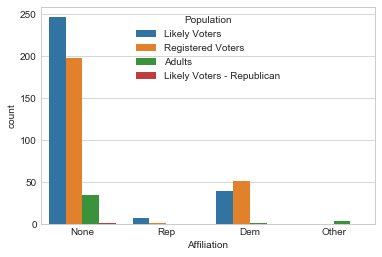

In [10]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

Sieht aus als wären viele wahrscheinliche Wähler (en. likely voters) und registrierte Wähler (en. registered voters) inbegriffen. Das bedeutet hoffentlich, dass unsere Umfragedaten eine gute Repräsentation der befragten Bevölerung darstellt. Schauen wir uns noch einmal kurz den DataFrame an.

**Gib den Head des DataFrames aus.**

In [11]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Fahren wir damit fort, uns die Durchschnitte für Obama und Romeny anzuschauen. Außerdem schließen wir die Befragten mit ein, die unentschlossen sind. 

**Erstelle einen DataFrame namens "avg" (dt. Durchschnitt), der für die Daten aus "poll_df" den Durchschnitt beinhaltet. Schließe danach "Number of Observations" (*Hinweis:* `axis=0`) aus.**

In [12]:
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

**Erstelle einen DataFrame namens "std" (dt. Standardabweichung), der für die Daten aus "poll_df" die Standardabweichung beinhaltet. Schließe danach "Number of Observations" (*Hinweis:* `axis=0`) aus.**

In [13]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

**Nutze Pandas, um das folgende Balkendiagramm darzusellen.**

In [14]:
# Dein Code hier

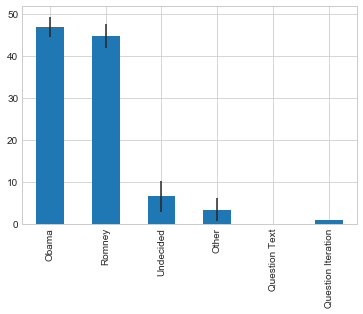

In [15]:
avg.plot(yerr=std,kind='bar',legend=False)

Interessant wie eng die Umfrage zu sein scheint. Insbesondere unter Berücksichtigung des "Unentschlossenheit"-Faktors (en. undecided). Schauen wir uns die Zahlen an.

**Erstelle einen DataFrame namens "poll_avg". Dieser soll sowohl "avg" als auch "std" beinhalten.**

In [16]:
poll_avg = pd.concat([avg,std],axis=1)

**Benennen die Spalten dieses neuen DataFrames in "Average" und "STD" um.**

In [17]:
poll_avg.columns = ['Average','STD']

**Zeige den neuen DataFrame an.**

In [18]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


Sieht aus als ob die verschiedenen Umfragen es als ziemlich knappes Rennen einstufen. Was ist mit den unentschlossenen Wählern? Die meisten davon werden sich entscheiden, sobald die Wahl stattfindet. Wenn wir annehmen, dass wir die unentschlossenen Wähler gleich auf Romeny und Obama verteilen können, dann sollte das ein nahezu unverfälschtes Ergebniss der finalen Differenz ergeben.

**Schau dir erneut den DataFrame `poll_df` mit `head()` an.**

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Wenn wir wollten könnten wir auch eine kurze Zeitreihen Analyse machen. Diese wird recht einfach und schnell sein! Das Ziel ist es, die Verteilung im Zeitverlauf zu betrachten. 

**Erzeuge mit Matplotlib ein Diagramm mit "End Date" auf der x- und `['Obama','Romney','Undecided']` auf der y-Achse.**

*Hinweis: Die Enddaten werden in umgekehrter chronologischer Reihenfolge angezeigt werden.*

In [20]:
# Dein Code hier

/Users/davidmika/anaconda3/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


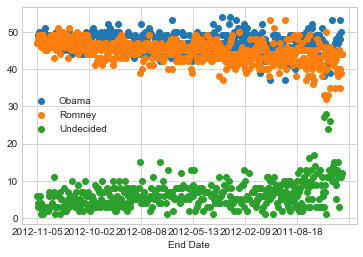

In [21]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

Das gibt uns einen sehr groben Überblick, allerdings ist es auch schwer zu lesen.

Um die Daten etwas besser zu verstehen erzeugen wir eine weitere Visualisierung. Dafür werden wir zunächst einige weitere Fragen beantworten. Als Ziel wollen wir die Differenz zwischen Obama und Romney im Zetverlauf darstellen. `Datetime` wird uns dabei eine hilfe sein.

**Importiere `datetime` aus `datetime`.**

In [22]:
from datetime import datetime

Jetzt werden wir in unserem "poll_df" DataFrame eine neue Spalte hinzufügen, die die Differenz zwischen Romney und Obama in den Umfragen festhält.

**Erzeuge die die Differenz zwischen Obama's und Romney's Ergebnissen und teile diese durch 100. Das Ergebnis soll in einer neuen Spalte namens "Differenz" (dt. Differenz) stehen.**

In [23]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

**Schau dir das Ergebnis des letzten Schritts mit `head()` an.**

In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Toll! Behalte im Kopf, dass die "Difference" Spalte Obama minus Romney betrachtet. Also bedeutet eine positive Differenz, dass Obama in der Umfrage vorne liegt. Und umgekehrt.

Fahren wir damit fort, diese Differenz im Zeitverlauf zu betrachten. Wir werden zuerst alle Umfragen mit dem gleichen Startdatum (Spalte: Start Date) gruppieren.

**Verwende `groupby()`, um die Umfragen nach ihrem "Start Date" zu gruppieren.**

*Hinweis: Du musst dafür einen Durchschnitt berechnen.*

In [25]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

**Schau dir das Ergebnis des letzten Schritts mit `head()` an.**

In [26]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


Toll! Jetzt können wir daraus ein Diagramm erstellen.

**Erzeuge ein Objekt namens "fig", das ein Diagramm für "Start Date" und "Difference" beinhaltet. Achte dabei außerdem auf den Stil.**

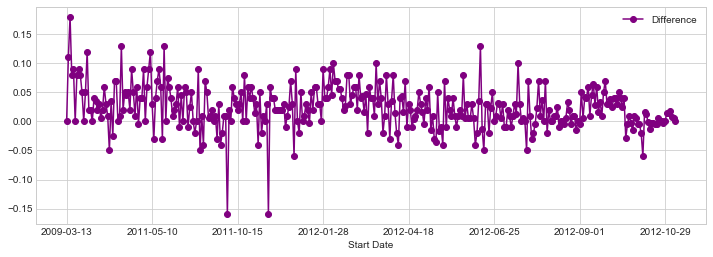

In [27]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

Es wäre sehr interessant zu sehen, wann die TV-Debatten waren. Dann könnten wir Vermutungen über deren Einfluss anstellen. 

Die Debatten fanden statt am 3. Oktober, 11. Oktober und 22. Oktober 2012. Lass uns diese Daten als LInien in das Diagramm zeichnen und auf den Monat Oktober zoomen.

Um herauszufinden, wo wir das Limit der x-Achse setzen müssen brauchen wir den Index des Monats Oktober in 2012. Hier siehst du eine einfache for-Schleife, die dir den Index liefert.

*Hinweis: Da dies durch das Datumsformat etwas kompliziert ist haben wir die for-Schleife bereits gegeben. Eine Erklärung dazu findest du in der Video-Lektion.*

In [28]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


Toll! Jetzt wissen wir, wo wir unsere oberen und unteren Limits für die x-Achse setzen müssen. 

**Lege `xlim` für das `fig` Objekt fest.**

In [29]:
# Dein Code hier

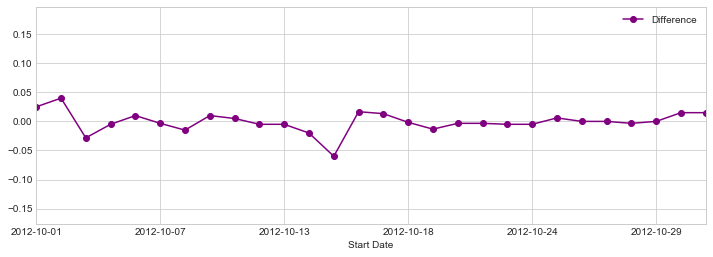

In [30]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

**Trage jetzt Linien für die TV-Debatten in das Diagramm ein.**

In [31]:
# Dein Code hier

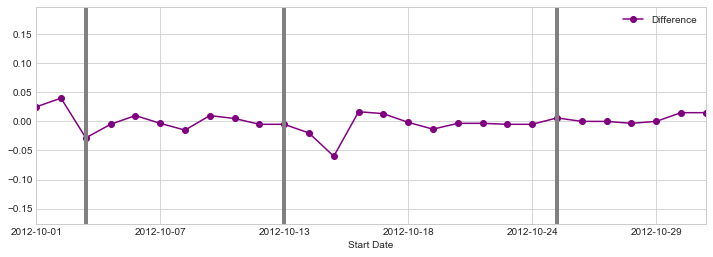

In [32]:
# Diagramm
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

# Neu: Linien
plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

Ersteunlicherweise spiegeln die Umfragen einen Einbruch für Obama nach der 2. Debatte wieder. Und das, obwohl er meiner Erinnerung zu folge bei der 1. Debatte wesentlich schlechter abschnitt.

Für all diese Umfragedaten ist es sehr wichtig, dass Geographie eine große Rolle für die Ergebnisse der Umfrage spielt. Man denke nur an die typische verteilung des US-amerikanischen Bundesstaaten zu verschiedenen Parteien.

## Spendendaten

Im zweiten Teil dieses Projekts werden wir uns einen Datensatz zu Spenden im Wahlkampf von 2012 anschauen. Das wird einer der größten Datensätze sein, mit denen wir im Kurs arbeiten. Ihr könnt sie [hier](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0) downloaden und dann im Verzeichnis der Notebooks speichern. 

Die Fragen, die wir beantworten möchten sind die folgenden:

1. Wie viel wurde gespendet und wie hoch war die durchschnittiche Spende?
2. Wie unterschieden sich die Spenden zwischen den Kandidaten?
3. Wie unterschieden sich die Spenden zwischen Demokraten und Republikanern?
4. Wie ist die Demographie der Spender?
5. Gibt es ein Muster der Spendenbeträge?

**Lade `Election_Donor_Data.csv` mit Pandas in einen DataFrame namens "donor_df".**

In [33]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/davidmika/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Schaue dir die `info()`, `describe()` und `head()` zum DataFrame an.**

In [34]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [35]:
donor_df.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [36]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Was interessant sein dürfte sind die Spendenbeträge. Verschaffen wir uns einen Überblick:

**Zähle die Erscheinungen der Werte in der Spalte "contb_receipt_amt".**

In [37]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

8079 verschiedene Beträge. Eine ziemliche Variation. Untersuchen wir dies genauer:

**Berechne den Durchschnitt der Spenden und speichere ihn in der Variablen "don_mean".**

In [38]:
don_mean = donor_df['contb_receipt_amt'].mean()

**Berechne die Standardabweichung der Spenden und speichere sie in der Variablen "don_std".**

In [39]:
don_std = donor_df['contb_receipt_amt'].std()

**Gib den unten stehenden Satz aus, indem du die beiden zuletzt erzeugten Variablen in einen String einfügst.**

In [41]:
print('Die durchschnittliche Spende war %.2f mit einer Standardabweichung von %.2f' %(don_mean,don_std))

Die durchschnittliche Spende war 298.24 mit einer Standardabweichung von 3749.67


Wow! Das ist eine riesige Standardabweichung. Wir sollten untersuchen, ob es irgendwelche sehr großen Spenden gab oder welche sonstigen Faktoren da eine Rolle gespielt haben könnten.

**Kopiere die Spalte "contb_receipt_amt" in eine Series namens "top_donor".**

In [46]:
top_donor = donor_df['contb_receipt_amt'].copy()

**Sortiere die neue Series.**

In [51]:
top_donor = top_donor.sort_values()

**Zeige die sortierte Series an.**

In [52]:
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

Sieht aus als hätten wir einige negative Beträge als auch riesige Spenden! Die negativen Einträge kommen daher, dass die FEC (zuständige Behörde) auch die Erstattungen notiert. Fahren wir fort und betrachten nur die positiven Beträge.

**Aktuallisiere die "top_donor" Series und behalte nur die positiven Werte.**

In [53]:
top_donor = top_donor[top_donor >0]

**Sortiere die neue Series.**

In [55]:
top_donor.sort_values()

334504          0.01
321779          0.01
323547          0.01
325614          0.01
326100          0.01
325982          0.01
318560          0.01
325986          0.01
325429          0.01
323822          0.01
348154          0.01
329984          0.01
320749          0.01
320784          0.01
326053          0.01
325758          0.01
317753          0.01
325344          0.01
323661          0.01
319373          0.01
321025          0.01
326172          0.01
336020          0.01
335424          0.01
345103          0.01
323823          0.01
320309          0.01
325975          0.01
325973          0.01
321676          0.01
             ...    
99829       10000.00
709268      10000.00
708928      10000.00
710730      10000.00
709813      10000.00
41888       10000.00
708138      10000.00
923476      10000.00
709739      10000.00
708919      10000.00
709608      10000.00
876244      10000.00
710177      10000.00
708898      10000.00
708022      10000.00
711167      10000.00
710198      1

**Schaue dir die 10 häufigsten Spendenbeträge an.**

In [56]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Wir sehen, dass die 10 häufigsten Spendenbeträge zwischen 10 und 2500 Dollar liegen. 

Wir können relativ schnell überprüfen, ob üblicherweise Spenden von runder Summe (10, 20, 50, usw.) gemacht werden. Dazu können wir ein Histogramm erstellen und nach Ausschlägen bei diesen Werten schauen.

**Erstelle eine neuee Series "com_don", die die Spenden unter 2500 Dollar beinhaltet.**

In [57]:
com_don = top_donor[top_donor < 2500]

**Erstelle ein Histogramm der neuen Series und setze `bins=100`.**

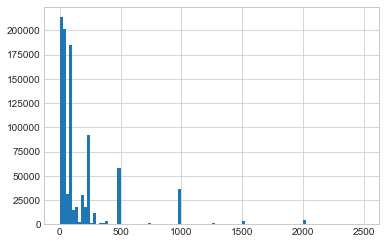

In [58]:
com_don.hist(bins=100)

Sieht aus, als ob unsere Intuition korrekt war: Die Ausschläge sind insbesondere bei den runden Summen. 

Tauchen wir etwas tiefer ein und teilen Spenden nach den Parteien auf. Um dies zu tun müssen wir einen Weg finden, um eine neue "Party" (dt. Partei) Spalte zu erzeugen. Wir könenn dazu die Kandidaten nutzen und dann ihre Parteizugehörigkeit verwenden.

**Zeige die uniquen Kandidaten an und speichere sie in der "candidates" Variablen.**

In [59]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

Die Zugehörigkeit der Kandidaten zu den Parteien sei gegeben:

In [60]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

**Verwende `map`, um eine neue Spalte "Party" im "donor_df" DataFrame zu erzeugen, die dem Kandidaten die passende Partei zuweiset.**

In [61]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)

Lasst uns sicher gehen, dass die negativen Beträge aus dem DataFrame ausgeschlossen werden.

**Bereinige den DataFrame um die negativen Spenden.**

In [62]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]

**Schaue dir den aktuallisierten DataFrame an.**

In [63]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Fahren wir damit fort, die Daten nach Kandidaten aggregieren. Wir schauen uns schnell an, wie viel jeder Kandidat erhalten hat.

**Zeige die Anzahl der Spenden an, die jeder Kandidat erhalten hat.**

In [64]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Ok, offensichtich hat Obama die meisten Spenden erhalten. Das ergibt Sinn, da er nicht mit anderen demokratischen Kandidaten um die Spenden konkuriert. Schauen wir uns nun die Summe der Spenden an:

**Zeige die Summe der Spenden an, die jeder Kandidat erhalten hat.**

In [65]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

Das ist nicht gut lesbar, wir sollten es bearbeiten. Zu den wichtigen Aspekten von Data Science gehört es auch, Informationen verständlich zu präsentieren. Deshalb sollten wir diese Werte mit einem for-Loop und vollständigen Setzen ausgeben.

**Erstelle eine for-Schleife, um für jeden Kandidaten die untenstehenden Sätze zu erzeugen.**

In [68]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print(" Der/Die Kandidat(in) %s sammelte %.0f dollar ein." %(cand_amount.index[i],don))
    print('\n')
    i += 1

 Der/Die Kandidat(in) Bachmann, Michelle sammelte 2711439 dollar ein.


 Der/Die Kandidat(in) Cain, Herman sammelte 7101082 dollar ein.


 Der/Die Kandidat(in) Gingrich, Newt sammelte 12832770 dollar ein.


 Der/Die Kandidat(in) Huntsman, Jon sammelte 3330373 dollar ein.


 Der/Die Kandidat(in) Johnson, Gary Earl sammelte 566962 dollar ein.


 Der/Die Kandidat(in) McCotter, Thaddeus G sammelte 39030 dollar ein.


 Der/Die Kandidat(in) Obama, Barack sammelte 135877427 dollar ein.


 Der/Die Kandidat(in) Paul, Ron sammelte 21009620 dollar ein.


 Der/Die Kandidat(in) Pawlenty, Timothy sammelte 6004819 dollar ein.


 Der/Die Kandidat(in) Perry, Rick sammelte 20305754 dollar ein.


 Der/Die Kandidat(in) Roemer, Charles E. 'Buddy' III sammelte 373010 dollar ein.


 Der/Die Kandidat(in) Romney, Mitt sammelte 88335908 dollar ein.


 Der/Die Kandidat(in) Santorum, Rick sammelte 11043159 dollar ein.




Das ist zwar verständlich, aber noch immer nicht gut vergleichbar.

**Erstelle ein Balkendiagramm der summierten Spenden pro Kandidaten.**

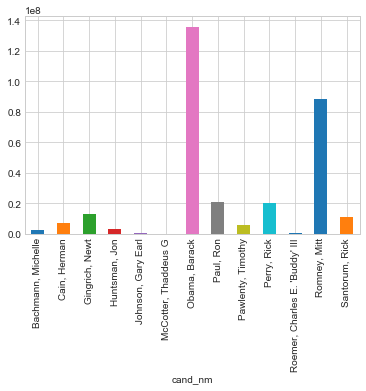

In [69]:
cand_amount.plot(kind='bar')

Jetzt ist der Vergleich relativ leicht zu ziehen. Wie wir vorher gesehen haben ist Obama der größte Spendenempfänger. Die ergibt Sinn, da es keine anderen demokratischen Kandidaten gibt. Wie wäre es, wenn wir nur Demokraten und Republikaner vergleichen?

**Erstelle ein Balkendiagramm der Spenden pro Partei.**

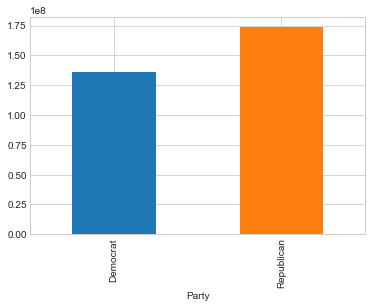

In [70]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Sieht aus als könnte Obama mit der Gesamtheit der Republikaner nicht mithalten. Aber er hat ganz klar den Vorteil, dass ihre Spenden sich auf viele Kandidaten aufteilen.

Zu guter Letzt, um das Projekt zum Ende zu bringen, möchten wir uns noch die Spenden anschauen und insbesondere, von wem sie kamen. Wir werden die "contr_occupation" (dt. Spender Beruf) Information aus dem donor_df DataFrame nutzen. 

**Verwende `pivot_table`, um für jeden Beruf die summierte Spende pro Partei anzuzeigen. Speichere dein Ergebnis in einen neuen "occupation_df" DataFrame.**

In [71]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

**Zeige den neuen DataFrame an.**

In [72]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


Toll! Jetzt sollten wir überprüfen, wie groß dieser DataFrame ist.

**Finde heraus, wie groß der DataFrame ist.**

In [73]:
occupation_df.shape

(45067, 2)

Wow! Das sind sehr viele. Leider zu viele, um sie in einem statischen Diagramm effektiv darzustellen. Wir sollten eine Grenze ziehen, und Einzelbeträge unter dieser ausschließen. Viele kleine 20 Dollar Spenden einer Berufsgruppe sind für uns nicht so interessant, wie die großen Geldgeber. Wir wählen als Grenzwert für die summierten Spenden eines Berufs $1.000.000.

**Aktuallisiere den "occupation_df" DataFrame und behalte nur summierte Spenden von mehr als 1 Mio. Dollar.**

In [74]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

**Finde heraus, wie groß der aktuallisierte DataFrame ist.**

In [75]:
occupation_df.shape

(31, 2)

Gut! Das sieht wesentlich "umgänglicher" aus. Wir können es jetzt visualisieren.

**Erstelle ein Balkendiagramm für die summierten Spenden pro Berufsgruppe für den aktuallisierten DataFrame.**

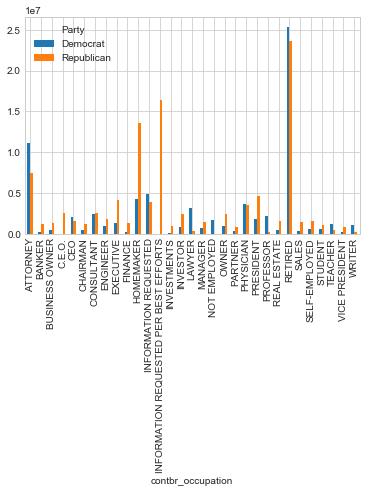

In [76]:
occupation_df.plot(kind='bar')

Immer noch etwas schwer zu lesen. Lasst uns `barh` verwenden, um das ganze horizontal auszurichten.

**Erzeuge das gleiche Diagramm. Wähle diesesmal eine horizontale Darstellung.**

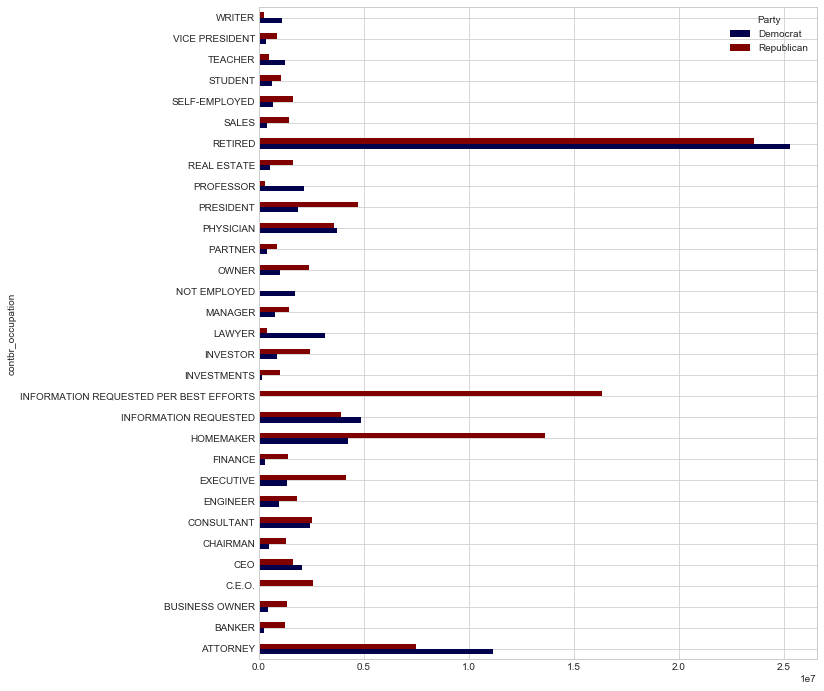

In [77]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Sieht aus, als wären manche Berufe falsch beschriftet. Außerdem können wir CEO und C.E.O. kombinieren.

**Schließe "INFORMATION REQUESTED PER BEST EFFORTS" aus dem DataFrame aus.**

In [78]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

**Aktuallisiere die Einträge für CEO durch die Summe aus CEO und C.E.O. Anschließend entferne den Eintrag für C.E.O. aus dem DataFrame.**

In [79]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.',inplace=True)

**Erzeuge nun erneut das horizontale Balkendiagramm.**

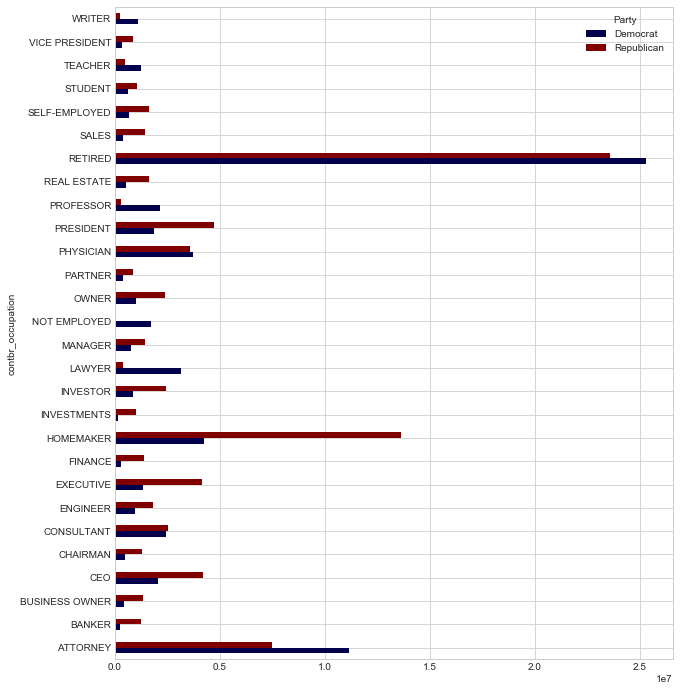

In [80]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Toll! Sieht aus gut aus.

Es gibt noch so viel in diesem Datensatz zu analysieren. Werde kreativ, denke über die politischen Faktoren nach und stelle eigene Fragen auf. Diese kannst du versuchen mit Python zu beantworten. Natürlich komplett freiwillig und optional.

# Gut gemacht!